**Gabriela Tanumihardja**</br>
**Capstone Project - Part IV** </br>
**Data adjustment**

## Table of contents
1. [Loading data](#load)
2. [Feature engineering - year](#year)</br>
3. [Resampling](#resample)</br>
4. [EDA](#eda)</br>
    4.1 [Word clouds](#clouds)</br>
***

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn.feature_extraction.text import CountVectorizer
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import train_test_split
import datetime as dt
import string
from wordcloud import WordCloud
%matplotlib inline

***

### Loading Data
<a id='load'></a>

From my early models, I can see that there are a few biases that need to be addressed. First, the year issue. The number 2013 came up in the satire most predictive words. I suspect this is because there are more legitimate articles that are more current compared to the satires. I expected this since I scraped all the nyt articles from 2020. First, I would like to confirm this suspicion.

In [2]:
# Loading data

df_og = pd.read_csv('~/Desktop/DATASCIENCE/CAPSTONE/data/clean_df.csv')

In [3]:
# Check!

df_og.head()

,title,topic,date_published,source,satire
0,Guy who has definitely gotten into a fight at ...,national,2020-08-24T12:20:03-04:00,beaverton,1
1,Party that wants to manage government can’t ma...,national,2020-08-24T09:49:25-04:00,beaverton,1
2,Canada searches for new country to compare our...,national,2020-08-21T15:14:56-04:00,beaverton,1
3,Trudeau hopes giving Parliament five week vaca...,national,2020-08-18T19:08:42-04:00,beaverton,1
4,Highlights of Andrew Scheer’s tenure as Conser...,national,2020-08-17T11:34:45-04:00,beaverton,1


In [4]:
# what kind of data are contained in these columns?

df_og.dtypes

title             object
topic             object
date_published    object
source            object
satire             int64
dtype: object

I would now like to extract the year of article published. First I need to change the data type contained in the `date_published` column to datetime. Currenty, the `date_published` column contains an object type. It also looks like that this data contain timezone information. I will need to localize the data using a datetime function (keeping local time, and removing timezone information). 

***
### Feature engineering - Year
<a id='year'></a>

In [6]:
# Switch data type for the date_published column!

df_og['date_published'] = pd.to_datetime(df_og.date_published, utc = True)

# Remove timezone information

df_og.date_published.dt.tz_localize(None)

0       2020-08-24 16:20:03
1       2020-08-24 13:49:25
2       2020-08-21 19:14:56
3       2020-08-18 23:08:42
4       2020-08-17 15:34:45
                ...        
46093   1996-02-21 00:18:00
46094   1995-12-19 00:38:00
46095   1995-12-12 00:55:00
46096   1993-12-07 00:09:00
46097   1993-12-07 00:01:00
Name: date_published, Length: 46098, dtype: datetime64[ns]

To simplify the process, I will create a new column with just year information. Then I will be ready to plot the year distribution!

In [7]:
# New column for year

df_og['year'] = df_og['date_published'].dt.year

In [8]:
# What are the unique values for the year column?

df_og['year'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2003, 2009, 2008, 2007, 2006, 2005, 2004, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1993])

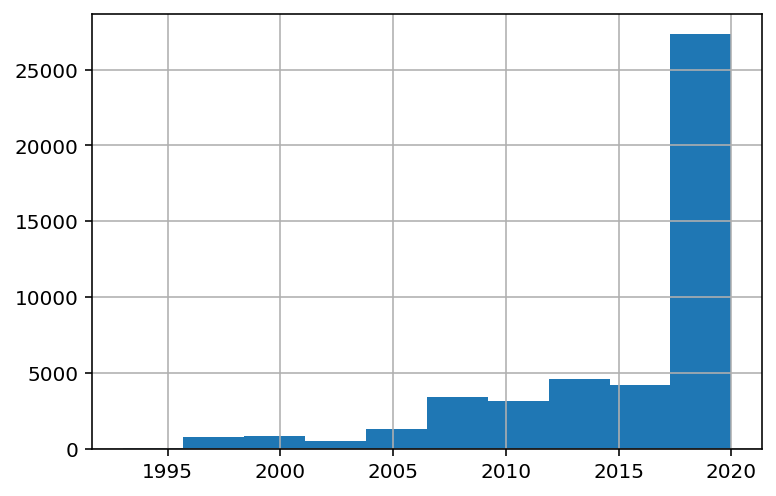

In [9]:
# Quick look

df_og['year'].hist();

Yikes! That is definitely a problem. Overall there are articles spanning from 1993 to 2020. There are very few articles in the early years and a lot in 2020. Rather than just sampling down the articles at this point, I would like to scrape more nyt articles. I would like to scrape all the articles I could from the API from 1993 to 2020. </br>
**GO BACK TO NOTEBOOK PT 1 - scraping**

***

### Resample the data
<a id='resample'></a>

Great! By scraping more nyt articles, now I feel like I have more appropriate data. I do suspect that I would still need to resample the data by year, however. But first let's load in the data!

In [10]:
# Loading data

bvt = pd.read_csv('~/Desktop/DATASCIENCE/CAPSTONE/data/beaverton.csv', index_col = 0)

glb = pd.read_csv('~/Desktop/DATASCIENCE/CAPSTONE/data/globeandmail.csv', index_col = 0)

nyt = pd.read_csv('~/Desktop/DATASCIENCE/CAPSTONE/data/sampled_nyt.csv', index_col = 0)

onion = pd.read_csv('~/Desktop/DATASCIENCE/CAPSTONE/data/theonion.csv', index_col = 0)

I will now add the target variable column into each of these dfs and make a master df. I will perform this task the same way as before.

In [11]:
# Satire tag

bvt['satire'] = 1

onion['satire'] = 1

In [12]:
# Legitimate tag

nyt['satire'] = 0

glb['satire'] = 0

In [13]:
# Put all into one dataframe

df = pd.concat([bvt, glb, nyt, onion], axis = 0)

In [14]:
df.sample(5)

,title,topic,date_published,source,satire
7879,Upcoming Athlete Biopics,sports,2010-11-26T08:00:00-06:00,the onion,1
1576942,Top Fun,Blogs,2009-10-22T16:39:46+0000,nyt,0
1879,Millennials applaud new PC Optimum points as t...,business,2017-11-08T18:43:19-05:00,beaverton,1
8870,On Possibly Moving The Thanksgiving Game Out O...,sports,2008-11-27T06:00:41-06:00,the onion,1
720403,Remember Global Warming?,Opinion,1998-11-11T05:00:00+0000,nyt,0


I will now do the same analyses as above for the year published to get a better sense of how much sampling I need to do.

In [15]:
# Switch data type for the date_published column!

df['date_published'] = pd.to_datetime(df.date_published, utc = True)

# Remove timezone information

df.date_published.dt.tz_localize(None)

0       2020-08-24 16:20:03
1       2020-08-24 13:49:25
2       2020-08-21 19:14:56
3       2020-08-18 23:08:42
4       2020-08-17 15:34:45
                ...        
20195   1996-02-21 00:18:00
20196   1995-12-19 00:38:00
20197   1995-12-12 00:55:00
20198   1993-12-07 00:09:00
20199   1993-12-07 00:01:00
Name: date_published, Length: 51102, dtype: datetime64[ns]

In [16]:
# Make a new column with year

df['year'] = df['date_published'].dt.year

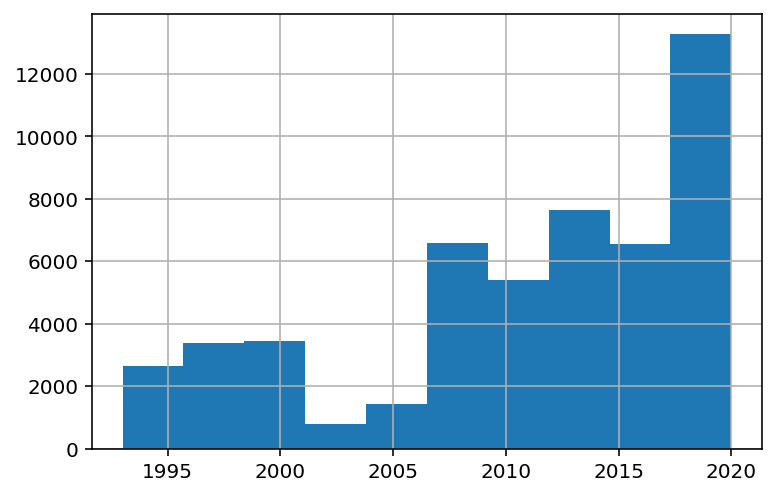

In [17]:
# Quick plot

df['year'].hist();

The distribution has gotten better compared to the original data. However, I see two points here that I need to correct. Firstly, we still have more news from 2020 compared to other years. I will resample this year. Secondly there is significantly less news articles published prior to 2005. To fix this, I may just drop any articles published before 2005. But first and foremost, I would like to see if the my target category is still balanced.

In [18]:
# Unique values!

df['satire'].value_counts()/len(df)

0    0.551446
1    0.448554
Name: satire, dtype: float64

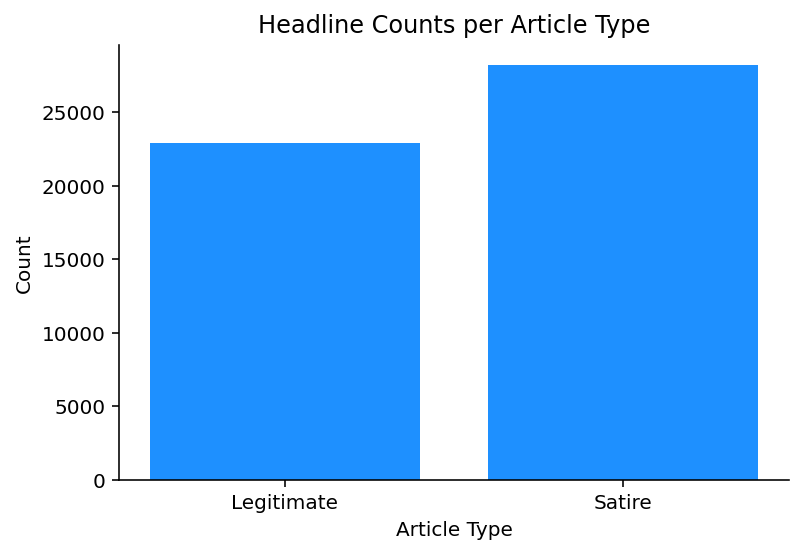

In [19]:
# quick plot to see if the classes are balanced

plt.figure()
plt.bar(df['satire'].unique(), df['satire'].value_counts(), color = 'dodgerblue')
plt.xticks([0,1], labels = ['Legitimate', 'Satire'])
plt.xlabel('Article Type')
sns.despine()
plt.ylabel('Count')
plt.title('Headline Counts per Article Type')
plt.show()

The balance of the target variable is not as great as it was before, with 55% articles legitimate, and 45% articles satirical. I don't think that this is not too much of a big deal, however. In the grand scheme or things, they are still relatively balanced. Now I will move on with the data cleaning. Similar to before, I will drop any duplicated rows and any rows containing null values.

In [20]:
# Check for null value

df.isna().sum()

title             0
topic             0
date_published    0
source            0
satire            0
year              0
dtype: int64

In [21]:
# Check for duplicated rows

df.duplicated().sum()

84

In [22]:
# Drop them, drop them

df.drop_duplicates(inplace = True)

Now, I would like to just keep the data from 2006 until 2020. This still represents 14 years of news and I think it should be good enough to train my model. I actually think that having too old of data will make it more difficult for the model to predict current news.

In [23]:
# Lop off data prior 2005!

df_small = df[df.year > 2005]

In [24]:
# Check

df_small.shape

(40023, 6)

Whew, we still have over 40,000 data. I think this amount of data is sufficient, even if we have to cut off more data during resampling. I will now check for the class balance, again, to see whether it has gone bad since our last cut.

In [25]:
# Unique values!

df_small['satire'].value_counts()/len(df_small)

1    0.503036
0    0.496964
Name: satire, dtype: float64

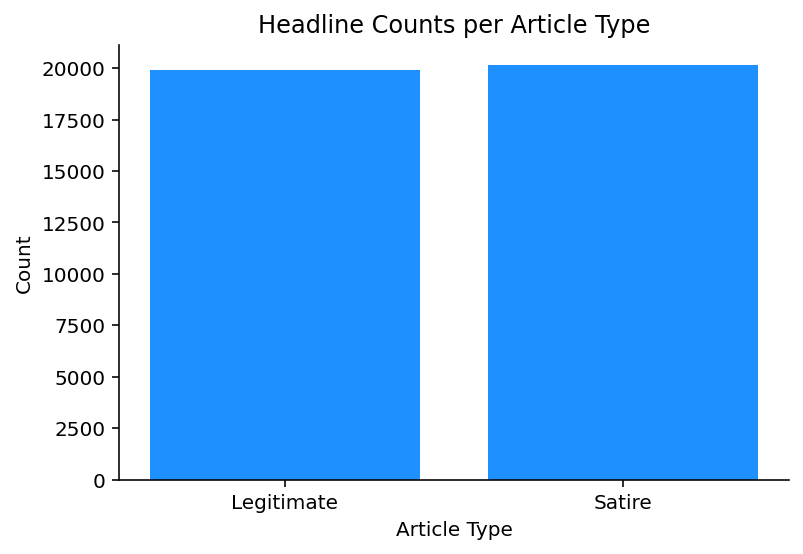

In [26]:
# quick plot to see if the classes are balanced

plt.figure()
plt.bar(df_small['satire'].unique(), df_small['satire'].value_counts(), color = 'dodgerblue')
plt.xticks([0,1], labels = ['Legitimate', 'Satire'])
plt.xlabel('Article Type')
sns.despine()
plt.ylabel('Count')
plt.title('Headline Counts per Article Type')
plt.show()

The balance has actually improved! I will now resample the data to even out the publishing year. Let's look at the year distribution again.

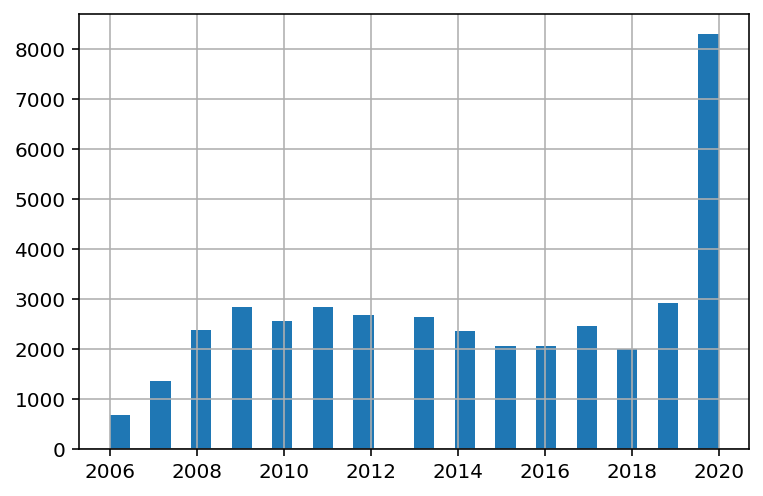

In [27]:
# Looking at the year distribution

df_small['year'].hist(bins = 30);

Ignoring 2020, the distribution is actually not so bad since we lop off anything before 2006. I will now separate the data into all articles published not in 2020 and articles published in 2020. 

In [28]:
# Separate majority and minority classes
df_2020 = df_small[df_small.year == 2020]
df_not_2020 = df_small[df_small.year != 2020]

From here, I will resample df_2020 to only 3000 headlines. I chose this number based on the graph above. This number is on the higher side, however I believe that because, in the final product, I would like to predict more current news, this slight bias may actually be useful.

In [29]:
from sklearn.utils import resample

# Downsample majority class
df_2020_downsampled = resample(df_2020, 
                                 replace=False,
                                 n_samples=3000,
                                 random_state=999)
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_2020_downsampled, df_not_2020])
 

I will now check for the distribution of year published.

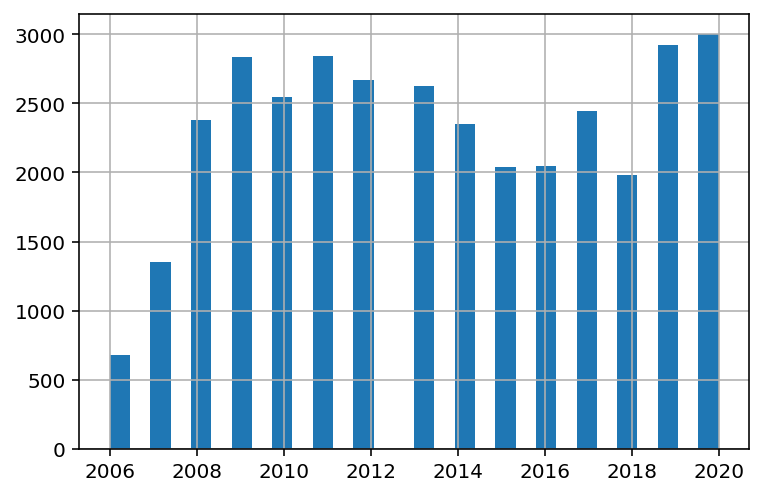

In [30]:
df_downsampled['year'].hist(bins = 30);

It's looking much better! Now, for hopefully the final time, I will check for the satire class balance.

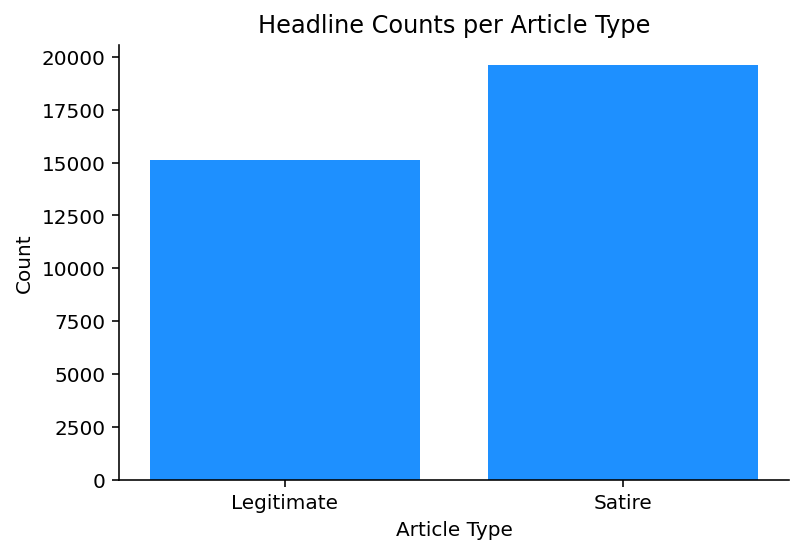

In [31]:
# quick plot to see if the classes are balanced

plt.figure()
plt.bar(df_downsampled['satire'].unique(), df_downsampled['satire'].value_counts(), color = 'dodgerblue')
plt.xticks([0,1], labels = ['Legitimate', 'Satire'])
plt.xlabel('Article Type')
sns.despine()
plt.ylabel('Count')
plt.title('Headline Counts per Article Type')
plt.show()

In [32]:
# class percentages

df_downsampled['satire'].value_counts()/len(df_downsampled)

1    0.564083
0    0.435917
Name: satire, dtype: float64

Our class balance has decreased again, however not to an unacceptable level. I will move on with this data. I need to export this data as a csv for convenience. 

In [33]:
# How many records do have now?

df_downsampled.shape

(34736, 6)

In [34]:
df_downsampled.sample(5)

,title,topic,date_published,source,satire,year
1648470,"When Star Is Covered, Cue 3-Point Shooter",Sports,2010-03-26 03:22:17+00:00,nyt,0,2010
1955507,Lottery Numbers,New York,2012-03-17 01:24:27+00:00,nyt,0,2012
2622698,Why Grown-Up Muggles Should Read ‘Harry Potter’,Opinion,2017-06-26 22:55:57+00:00,nyt,0,2017
2452928,Owner of The Orange County Register Files for ...,Business Day,2015-11-02 02:40:33+00:00,nyt,0,2015
17582,"Your Horoscopes – Week Of October 16, 2012",entertainment,2012-10-16 17:15:00+00:00,the onion,1,2012


After all the finagling, I still have almost 35,000 headlines. Very good, now to save to csv. I will reset the index first, just to make sure things stay neat!

In [35]:
# Reset index

df_downsampled.reset_index(inplace = True)

In [ ]:
df_downsampled.to_csv('data/year_sampled.csv')

***

### Quick EDA
<a id='eda'></a>

Now I will do very quick EDA of the new dataset we curated. I still have to deal with the 'Onion' and 'horoscope' debacles. I believe I could fix those problems by slightly modifying my trusty vectorizer. On we go...

In [36]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords 
ENGLISH_STOP_WORDS = stopwords.words('english')

In [37]:
# specify stop words

ENGLISH_STOP_WORDS = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [38]:
def my_tokenizer(sentence):
    
    # translation of pos_tag label to wordnet's label
    t_map = defaultdict(lambda : wn.NOUN)
    t_map['J'] = wn.ADJ
    t_map['V'] = wn.VERB
    t_map['R'] = wn.ADV

    for punctuation_mark in string.punctuation:
        # Remove punctuation and set to lower case
        sentence = sentence.lower().replace(punctuation_mark,'').replace('  ' , ' ').replace('onion', '').replace('horoscope', '')
    
    # remove any first and last empty spaces
    sentence = re.sub('^ ', '', sentence)
    sentence = re.sub(' $', '', sentence)
    sentence = re.sub('[0-9]{5,}', '#####', sentence)
    sentence = re.sub('[0-9]{4}', '####', sentence)
    sentence = re.sub('[0-9]{3}', '###', sentence)
    sentence = re.sub('[0-9]{2}', '##', sentence)

        
    # split sentence into words
    listofwords = sentence.split(' ')
    listoflemmas = []
    
    # get each word's pos_tag
    tagged = pos_tag(listofwords)

    # Remove stopwords and any tokens that are just empty strings
    for word, tag in tagged:
        # remove stop words, empty words and more spaces 
        if (not word in ENGLISH_STOP_WORDS) and (word!='') and (word != ' '):
            # Turn words to lemmas - according to their wn labels
            lemma = lemmatizer.lemmatize(word, t_map[tag[0]])
            listoflemmas.append(lemma)

    return listoflemmas

I will now separate the df into satire and legitimate before making a wordcloud for each class.

In [45]:
# Separate each class into a variable

satire = df_downsampled[df_downsampled['satire'] == 1]
legit = df_downsampled[df_downsampled['satire'] ==0]

In [46]:
satire.sample(5)

,index,title,topic,date_published,source,satire,year
952,134,Trump Spends National Prayer Breakfast Attacki...,politics,2020-02-06 18:33:00+00:00,the onion,1,2020
3369,426,White-hooded Warbler named Canada’s official n...,national,2016-11-18 01:35:14+00:00,beaverton,1,2016
18109,310,"Weak, Exhausted Nancy Pelosi Given Saline Drip...",politics,2019-09-25 17:35:00+00:00,the onion,1,2019
19802,2003,Unemployed Single Mother In Rubio Speech Told ...,politics,2015-10-01 16:21:00+00:00,the onion,1,2015
33748,18421,The Bachroulette,entertainment,2010-07-21 06:00:00+00:00,the onion,1,2010


I will now tokenize all of the titles, and create a dictionary of all the words and their frequency. I will then create some visualizations to show some possible trends.

In [47]:
# tokenize satirical titles, then append them to the dictionary

word_dict_satire = dict()

for title in satire['title']:
    word_list = my_tokenizer(title)
    for word in word_list:
        if word in word_dict_satire:
            word_dict_satire[word] += 1
        else:
            word_dict_satire[word] = 1

In [49]:
from operator import itemgetter

# sort from the most frequently used word and get the top 20

sorted(word_dict_satire.items(), key=itemgetter(1), reverse = True)[:20]

[('man', 1280),
 ('##', 1059),
 ('####', 973),
 ('new', 877),
 ('week', 662),
 ('get', 625),
 ('trump', 494),
 ('report', 484),
 ('woman', 459),
 ('go', 442),
 ('area', 440),
 ('make', 413),
 ('one', 404),
 ('game', 378),
 ('fan', 375),
 ('time', 368),
 ('know', 353),
 ('nfl', 353),
 ('nation', 335),
 ('take', 330)]

In [50]:
# tokenize satirical titles, then append them to the dictionary

word_dict_legit = dict()

for title in legit['title']:
    word_list = my_tokenizer(title)
    for word in word_list:
        if word in word_dict_legit:
            word_dict_legit[word] += 1
        else:
            word_dict_legit[word] = 1

In [51]:
# sort from the most frequently used word and get the top 20

top_20_legit = sorted(word_dict_legit.items(), key= itemgetter(1), reverse = True)[:20]

top_20_legit

[('new', 834),
 ('##', 809),
 ('say', 623),
 ('####', 475),
 ('u', 408),
 ('covid##', 271),
 ('trump', 238),
 ('plan', 209),
 ('take', 206),
 ('canadian', 205),
 ('time', 205),
 ('day', 203),
 ('make', 196),
 ('report', 195),
 ('york', 195),
 ('get', 195),
 ('case', 193),
 ('canada', 181),
 ('back', 172),
 ('city', 170)]

***
### Word clouds
<a id='clouds'></a>

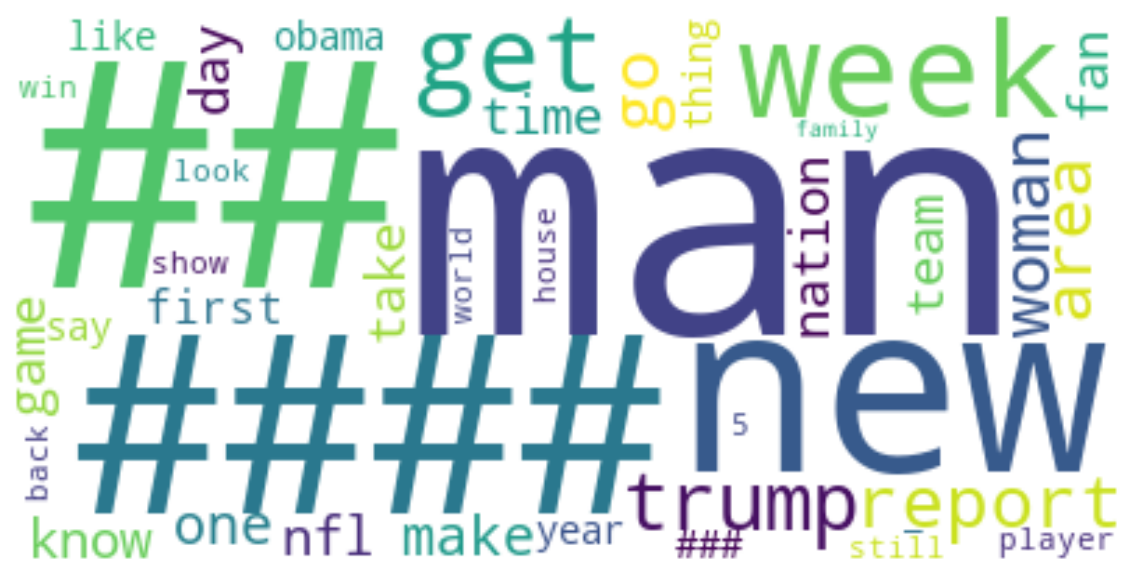

In [56]:
# Make wordcloud for satirical headlines

wordcloud_satire = WordCloud(background_color="white",max_words = 40).generate_from_frequencies(word_dict_satire)

plt.figure(figsize = (10,15))
plt.imshow(wordcloud_satire, interpolation='bilinear')
plt.axis("off")
plt.show()

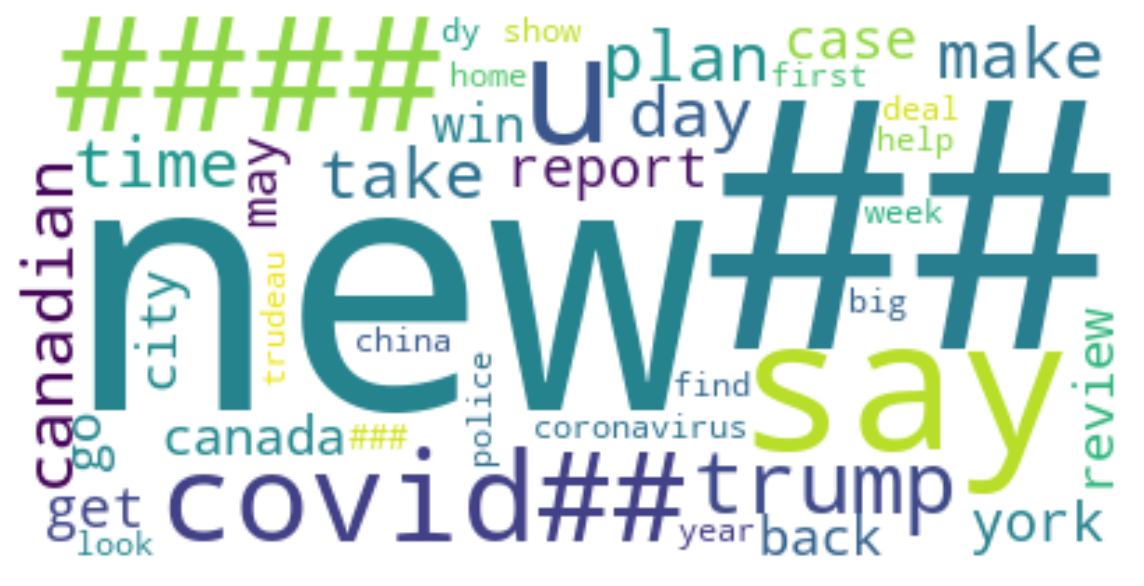

In [57]:
# Make word cloud for legitimate headlines

wordcloud_legit = WordCloud(background_color="white",max_words = 40).generate_from_frequencies(word_dict_legit)

plt.figure(figsize = (10,15))
plt.imshow(wordcloud_legit, interpolation='bilinear')
plt.axis("off")
plt.show()

The wordclouds look different than our previous wordclouds prior to data finagling. The words look a lot more neutral compared to our previous wordclouds... There are alot of the hashed words in both wordclouds. I think this is good because it could neutralize the models. I will now re-fit the initial models... I fully expect the results to be lower than my original models.</br>
**Moving on the next notebook pt.5**